## Гришин Илья Алексеевич, ИУ5-62Б, Вариант 6

### Рубежный контроль №2

#### Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### Методы построения моделей машинного обучения.

Набор данных содержит несколько параметров, которые считаются важными при подаче заявки на программу магистратуры.
Включены следующие параметры:

- Результаты GRE (из 340)                             
- Результаты TOEFL (из 120)                                
- Рейтинг вуза (из 5)                                 
- Заявление о целях и рекомендательное письмо (из 5 возможных) 
- Средний балл бакалавриата (из 10)                     
- Опыт исследования (0 или 1)                          
- Шанс допуска (от 0 до 1) 


В dataset обозначены как:

- (GRE Scores)
- (TOEFL Scores )
- (University Rating)
- (Statement of Purpose and Letter of Recommendation Strength)
- (Undergraduate GPA)
- (Research Experience)
- (Chance of Admit)

Шанс допуска (Chance of Admit) является целевым признаком


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
%matplotlib inline 
sns.set(style="ticks")

In [12]:
data = pd.read_csv('Admission_Predict.csv', sep=",")

In [13]:
# размер набора данных
data.shape

(400, 9)

In [14]:
# типы колонок
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [15]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:>

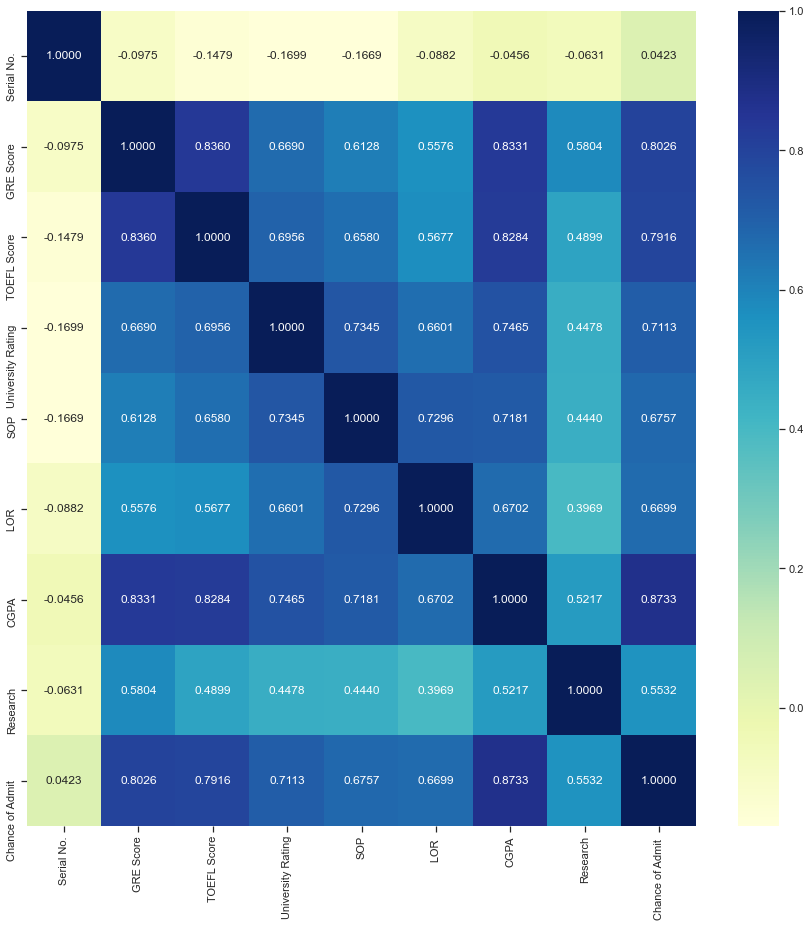

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt='.4f', cmap="YlGnBu")

In [17]:
data = data.drop('Serial No.', 1)
data.shape

(400, 8)

In [60]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65


### Метод опорных векторов: визуализация

In [19]:
data_x = data['CGPA'].values
data_y = data['Chance of Admit '].values

<AxesSubplot:>

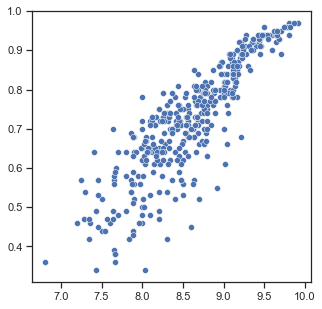

In [20]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=data_x, y=data_y)

In [21]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(data_x.reshape(-1, 1), data_y)
    data_y_pred = clf.predict(data_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(data_x, data_y, 'b.')
    ax.plot(data_x, data_y_pred, 'ro')
    plt.show()

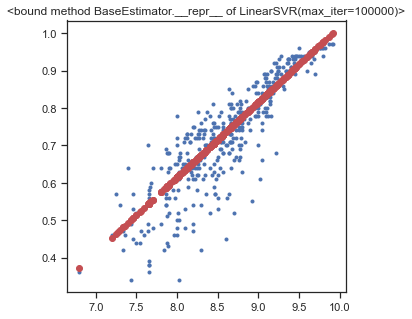

In [22]:
plot_regr(LinearSVR(C=1.0, max_iter=100000))

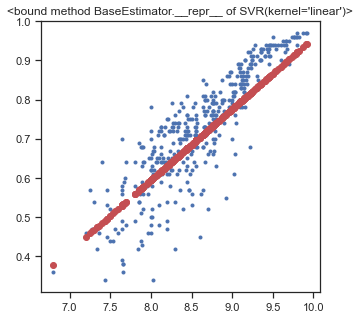

In [23]:
plot_regr(SVR(kernel='linear', C=1.0))

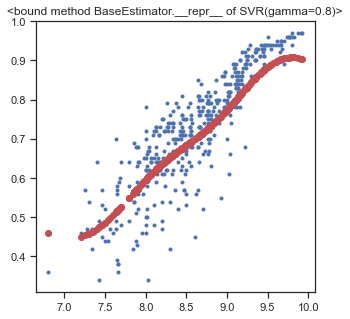

In [24]:
plot_regr(SVR(kernel='rbf', gamma=0.8, C=1.0))

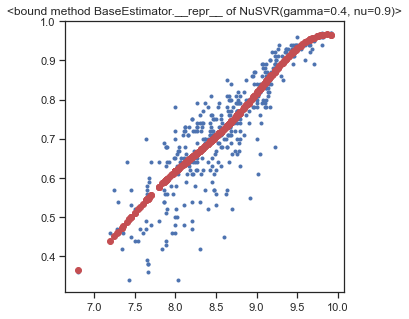

In [68]:
plot_regr(NuSVR(kernel='rbf', gamma=0.4, nu=0.9, C=1.0))

### Масштабирование данных

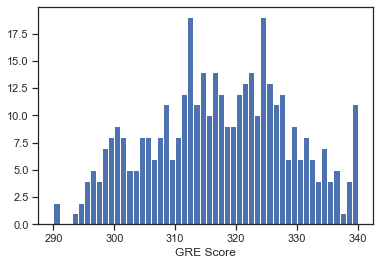

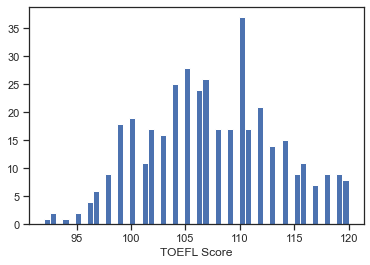

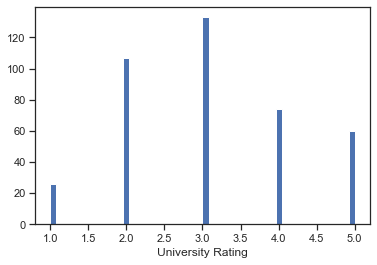

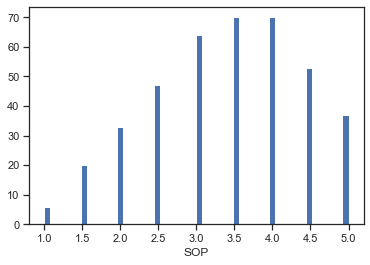

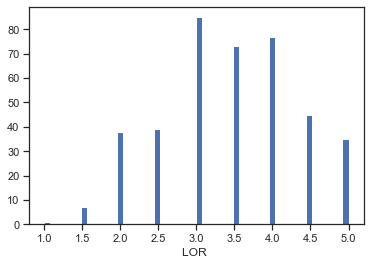

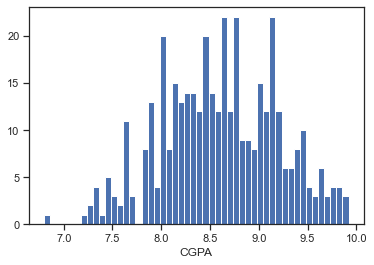

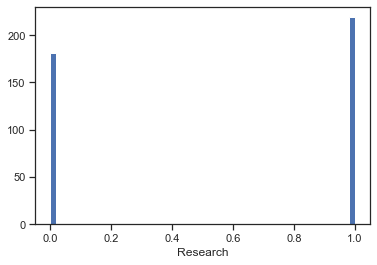

In [26]:
# Гистограмма по признакам
num_col = ['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
for col in num_col:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [27]:
# Масштабирование данных в диапазоне от 0 до 1
sc1 = MinMaxScaler()
for item in num_col:
    data.loc[:,item]=sc1.fit_transform(data[[item]])

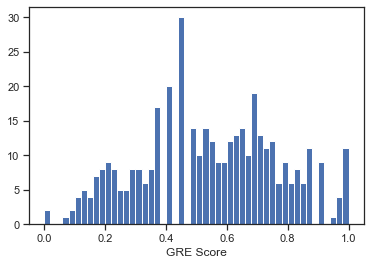

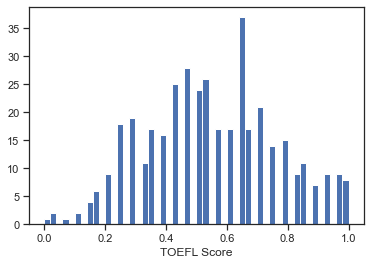

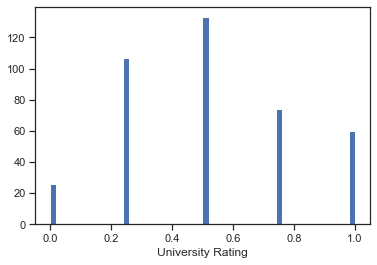

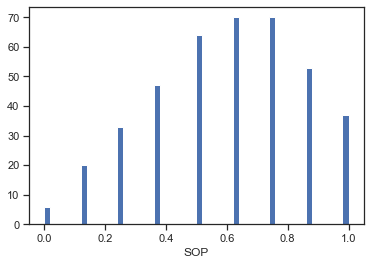

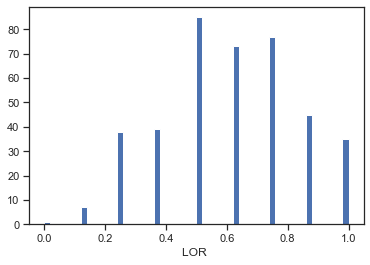

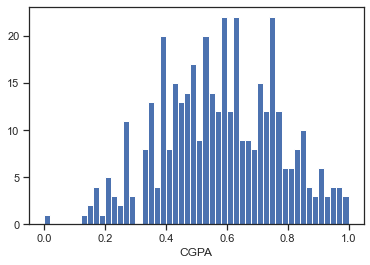

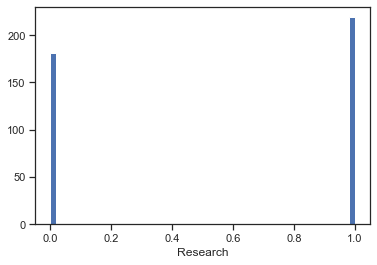

In [28]:
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

### Выбор класса для задачи регрессии метода опорных векторов

In [29]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data[num_col], data['Chance of Admit '], test_size=0.5, random_state=1)

data_X_train.shape, data_X_test.shape

((200, 7), (200, 7))

In [30]:
svr_1 = SVR()
svr_1.fit(data_X_train, data_y_train)

SVR()

In [31]:
data_y_pred = svr_1.predict(data_X_test)

In [32]:
mean_absolute_error(data_y_test, data_y_pred), mean_squared_error(data_y_test, data_y_pred)

(0.0739584651508103, 0.008272846937682871)

In [69]:
nusvr_1 = NuSVR(gamma=0.4, nu=0.9, C=1.0)
nusvr_1.fit(data_X_train, data_y_train)

NuSVR(gamma=0.4, nu=0.9)

In [70]:
data_y_pred = nusvr_1.predict(data_X_test)

In [71]:
mean_absolute_error(data_y_test, data_y_pred), mean_squared_error(data_y_test, data_y_pred)

(0.05002246866458401, 0.005954904919644795)

NuSVR(gamma=0.4, nu=0.9) имеет меньшие средние абсолютную и квадратичную ошибки по сравнению с SVR(). Поэтому для построения модели будем использовать NuSVR(gamma=0.4, nu=0.9).

### Построение моделей регрессии и оценка качеств моделей

In [72]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0, a, str(round(b,4)), color='black')
    plt.show()

In [73]:
# Качество отдельных моделей
def val_mae(model, array_mae, array_mse, array_r2):
    model.fit(data_X_train, data_y_train)
    data_y_pred = model.predict(data_X_test)
    result = mean_absolute_error(data_y_test, data_y_pred)
    result1 = mean_squared_error(data_y_test, data_y_pred)
    result2 = r2_score(data_y_test, data_y_pred)
    print(model)
    print('mean_absolute_error={}'.format(result))
    print('mean_squared_error={}'.format(result1))
    print('r2_score={}'.format(result2))
    array_mae += [result]
    array_mse += [result1]
    array_r2 += [result2]

In [74]:
array_labels = ['NuSVR','RandomForestRegressor']

In [75]:
array_mae =[]
array_mse =[]
array_r2 =[]
# Точность на отдельных моделях
for model in [
    NuSVR(kernel='rbf', gamma=0.4, nu=0.9, C=1.0),
    RandomForestRegressor()
]:
    val_mae(model, array_mae, array_mse, array_r2)
    print('==========================')
    print()

NuSVR(gamma=0.4, nu=0.9)
mean_absolute_error=0.05002246866458401
mean_squared_error=0.005954904919644795
r2_score=0.7389394978946133

RandomForestRegressor()
mean_absolute_error=0.049876499999999976
mean_squared_error=0.005026675649999996
r2_score=0.7796326747752347



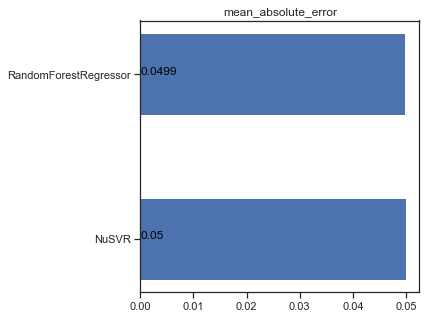

In [76]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'mean_absolute_error')

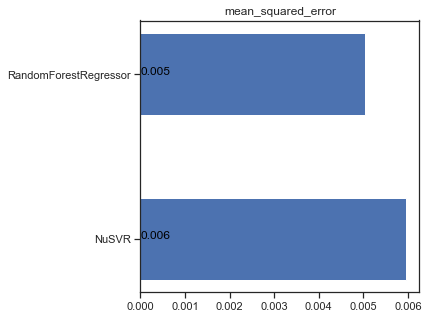

In [77]:
# Визуализация результатов
vis_models_quality(array_mse, array_labels, 'mean_squared_error')

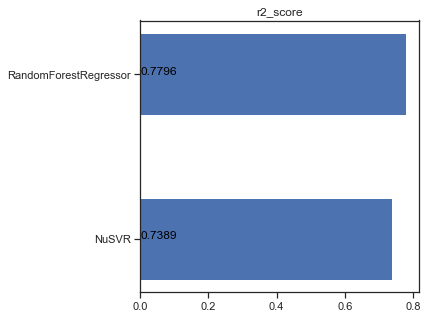

In [78]:
# Визуализация результатов
vis_models_quality(array_r2, array_labels, 'r2_score')

### Выводы

Модель RandomForestRegressor (случайный лес) имеет лучшие показатели: средние абсолютная и квадратичная ошибки меньше чем у модели NuSVR (метод опорных векторов), а коэффициент детерминации больше чем у NuSVR. Коэффициент детерминации случайного леса равен 0.782, что говорит о достаточно хорошей полученной модели (коэффициент корреляции около 90 %). Метод опорных векторов имеет небольшое переобучение, которое наблюдается на последнем графике в разделе "Метод опорных векторов: визуализация" на примере признаков 'CGPA' и 'Chance of Admit'. Однако с помощью выбора параметров gamma, nu, C в разделе "Выбор класса для задачи регрессии метода опорных векторов" на основе графиков и сравнения удалось добиться неплохих данных метрик качеств модели. 